## **Librerías**

In [1]:
import pandas as pd
import numpy as np
import statsmodels as st

In [2]:
pd.options.display.max_columns = False

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

## **Data**

In [144]:
# Leemos nuestra data
shampoo_sales = pd.read_csv(
    '../../Data/shampoo_sales.csv', 
    header=0,
    parse_dates=True,
)

shampoo_sales.head()

,Month,Sales
0,1-01,266.0
1,1-02,145.9
2,1-03,183.1
3,1-04,119.3
4,1-05,180.3


In [145]:
# Ajustamos el formato de nuestra columna de fecha
shampoo_sales['date'] = shampoo_sales['Month'].apply(lambda x: '190' + x)
shampoo_sales['date'] = pd.to_datetime(shampoo_sales['date'], format='%Y-%m')

In [146]:
# Ajustamos el indice de nuestro DataFrame
shampoo_sales.set_index('date', inplace=True)
shampoo_sales.drop('Month', axis=1, inplace=True)

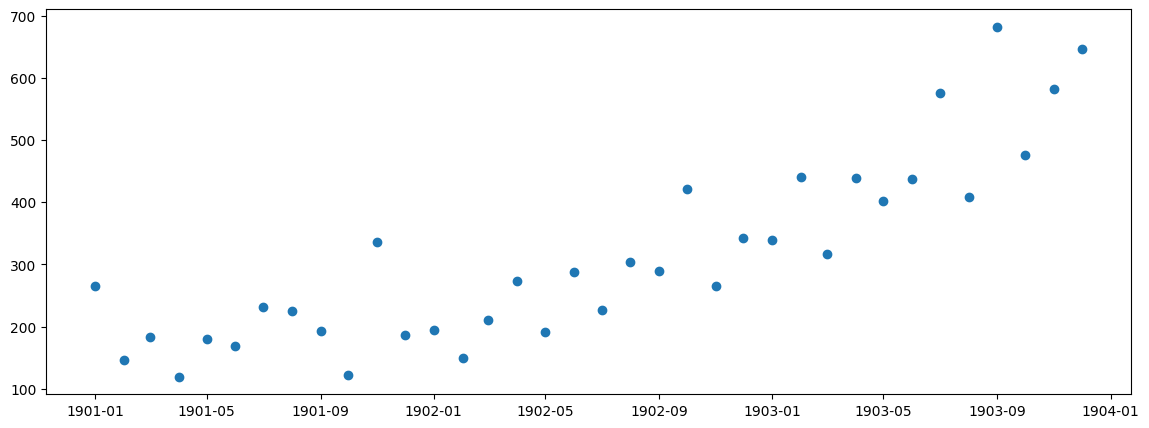

In [185]:
fig, ax = plt.subplots(figsize=(14, 5))

plt.scatter(
    shampoo_sales.index,
    shampoo_sales['Sales']
)

plt.show()

## **Upsampling**

In [155]:
# Creamos un nuevo DataFrame con la nueva escala de tiempo que necesitamos
upsampled = shampoo_sales.resample('1D').mean()
upsampled.shape

(1065, 1)

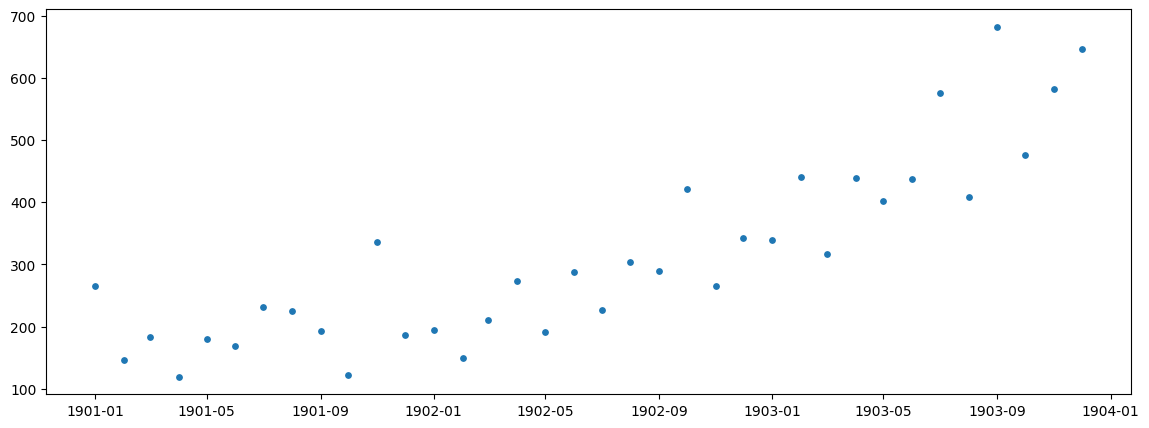

In [196]:
fig, ax = plt.subplots(figsize=(14, 5))

plt.scatter(
    upsampled.index,
    upsampled['Sales'],
    s=15
)

plt.show()

In [164]:
# Esto solo agrega valores para nuestro primer registro de cada año
upsampled.head()

,Sales
date,
1901-01-01,266.0
1901-01-02,NaN
1901-01-03,NaN
1901-01-04,NaN
1901-01-05,NaN


In [199]:
# Interpolamos la data de manera linear
interpolated = upsampled.interpolate(method='spline', order=2)
interpolated.head()

,Sales
date,
1901-01-01,266.000000
1901-01-02,258.630160
1901-01-03,251.560886
1901-01-04,244.720748
1901-01-05,238.109746


In [202]:
methods = [
    'linear', 'time', 'index', 'values', 'pad', 'nearest', 'zero', 'slinear', 'quadratic', 'cubic', 
    'barycentric', 'polynomial', 'krogh', 'piecewise_polynomial', 'spline', 'pchip', 'akima','cubicspline'
]

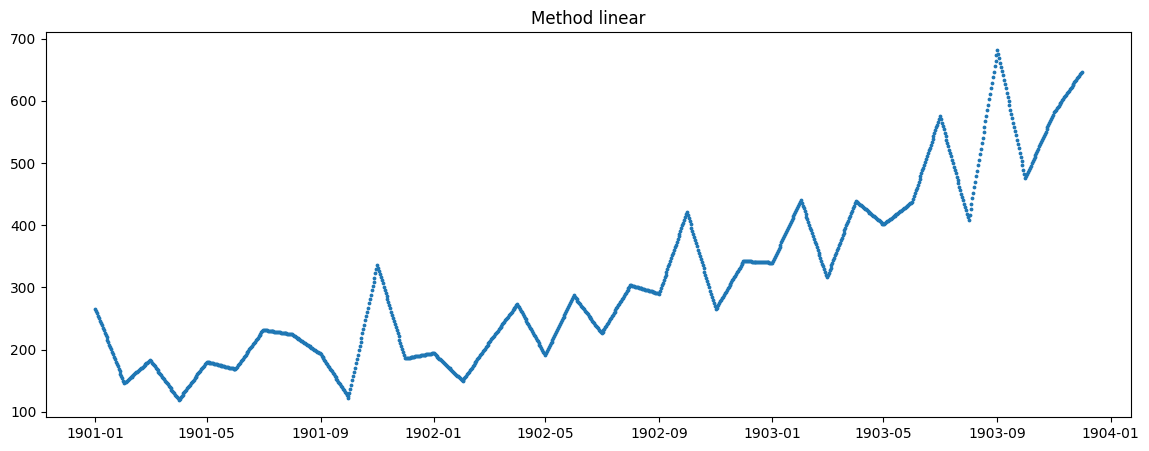

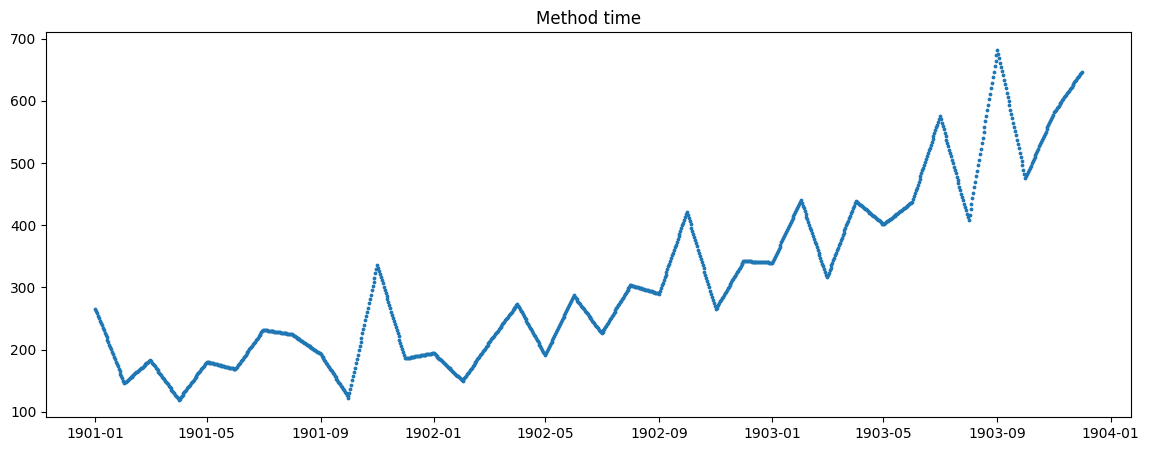

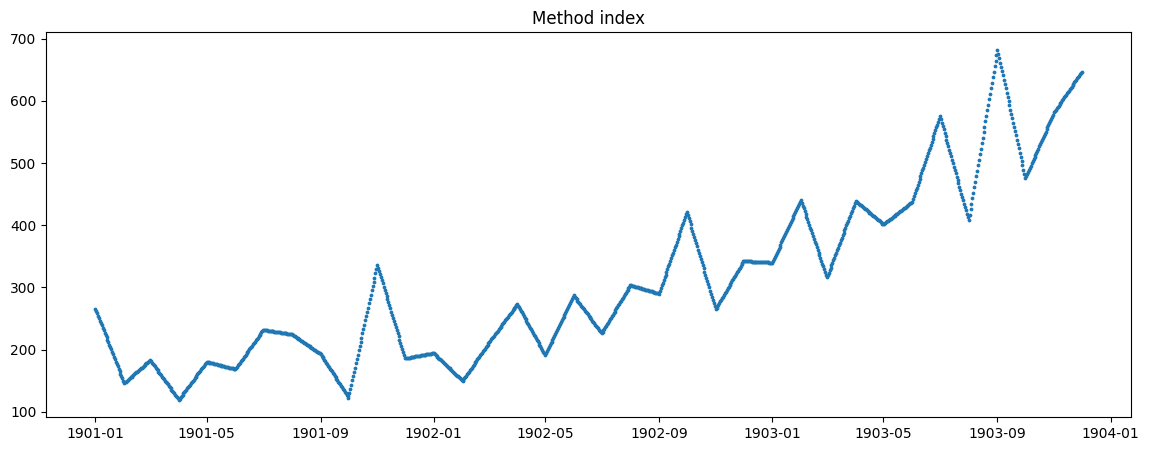

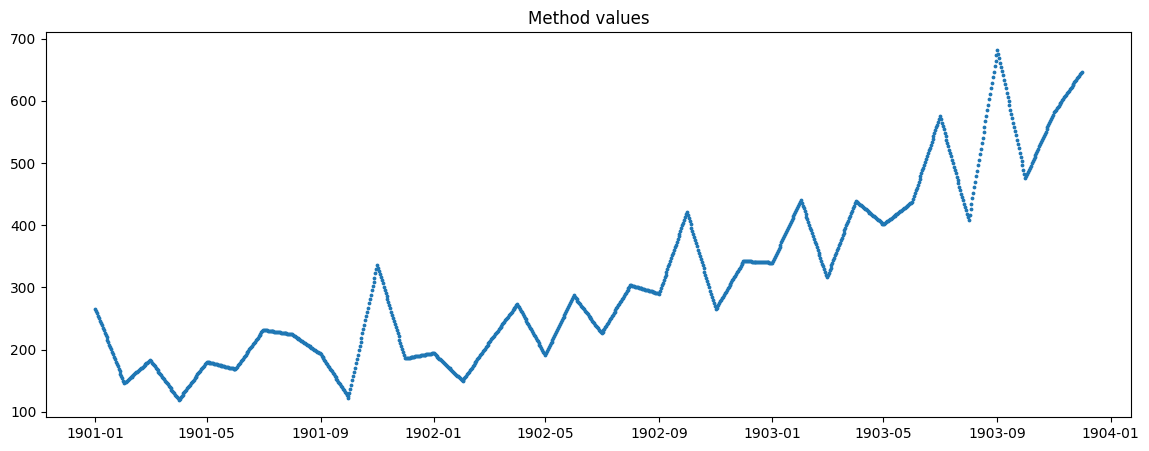

C:\Users\jmart\AppData\Local\Temp\ipykernel_19060\3205903316.py:6: FutureWarning: DataFrame.interpolate with method=pad is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  interpolated = upsampled.interpolate(method=i, order=2)


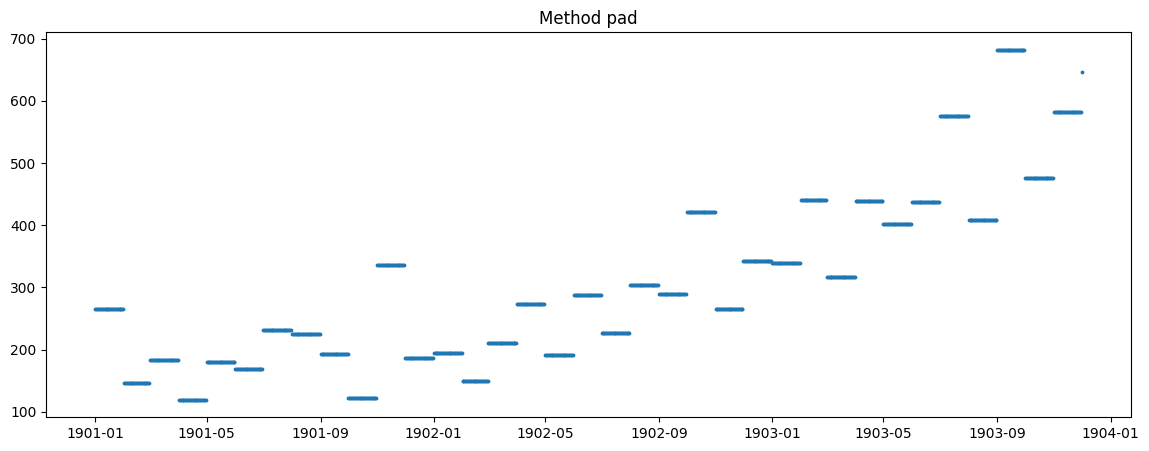

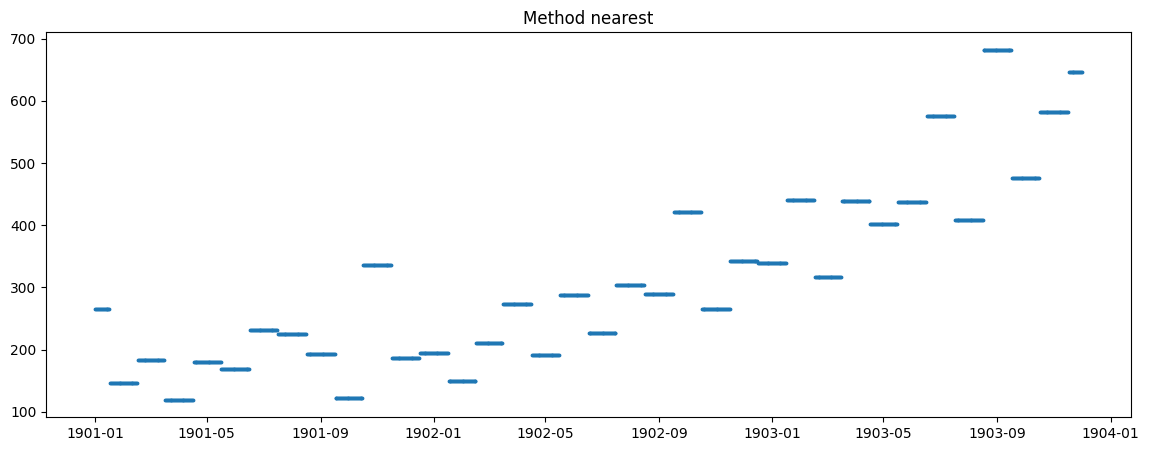

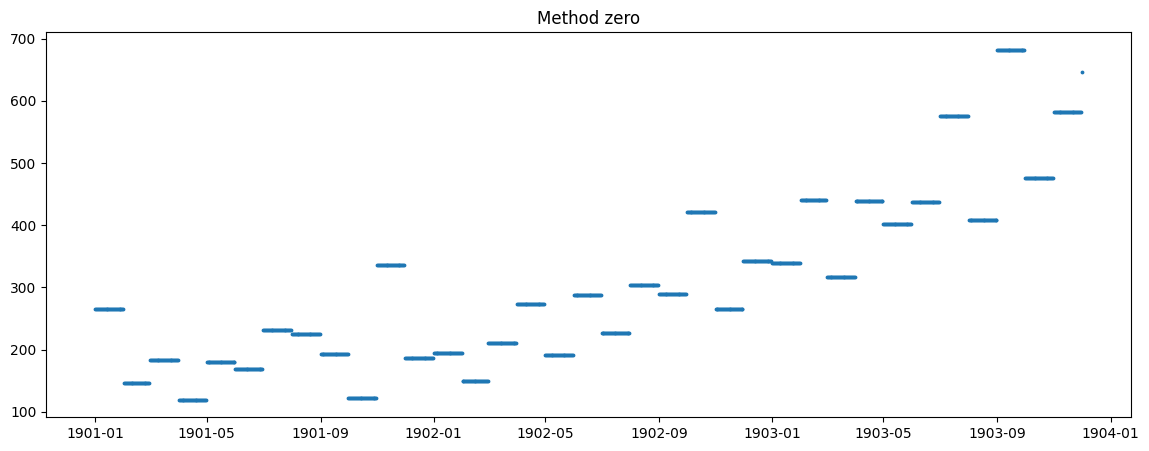

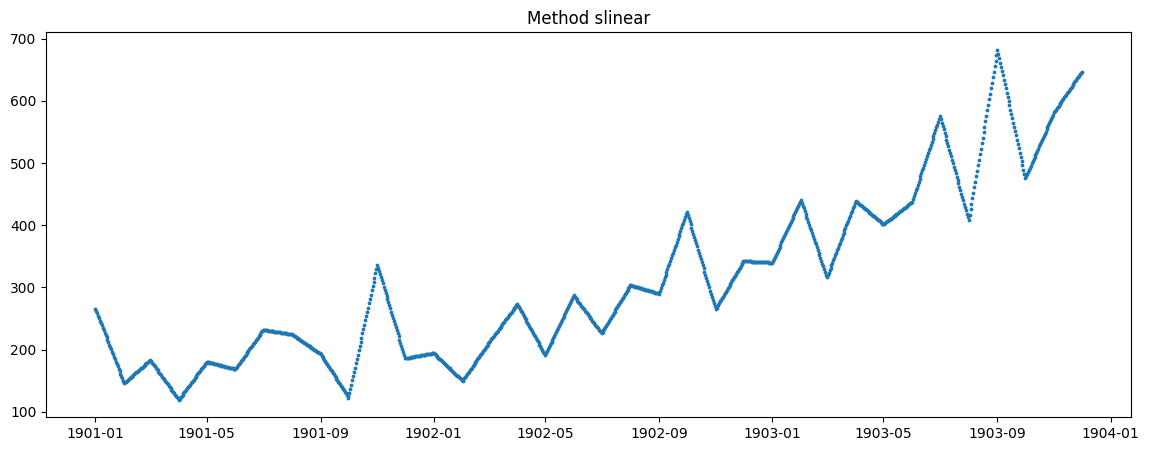

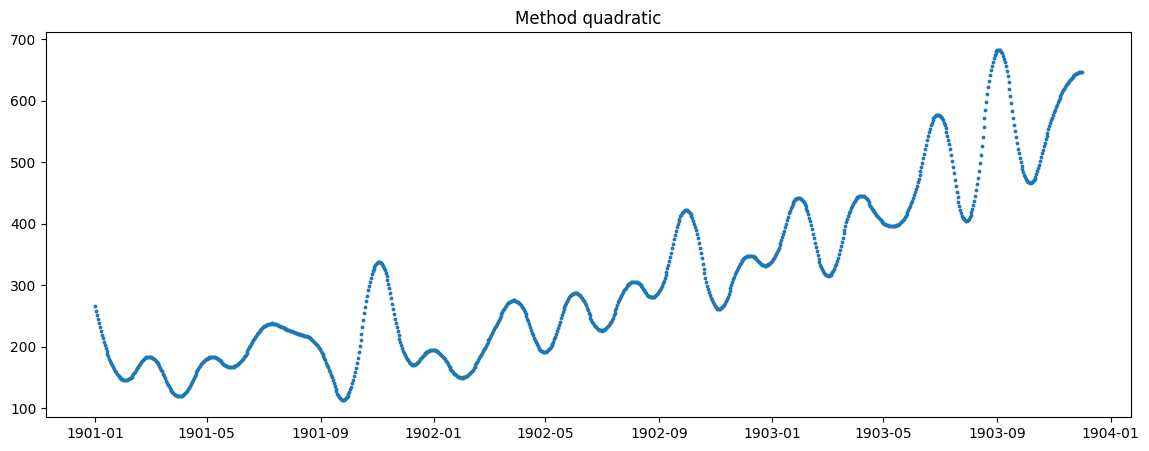

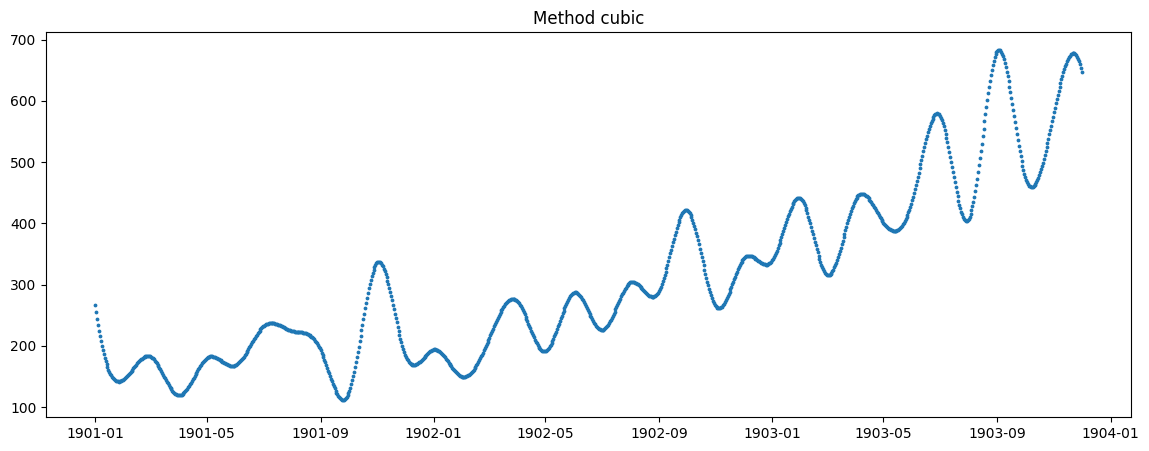

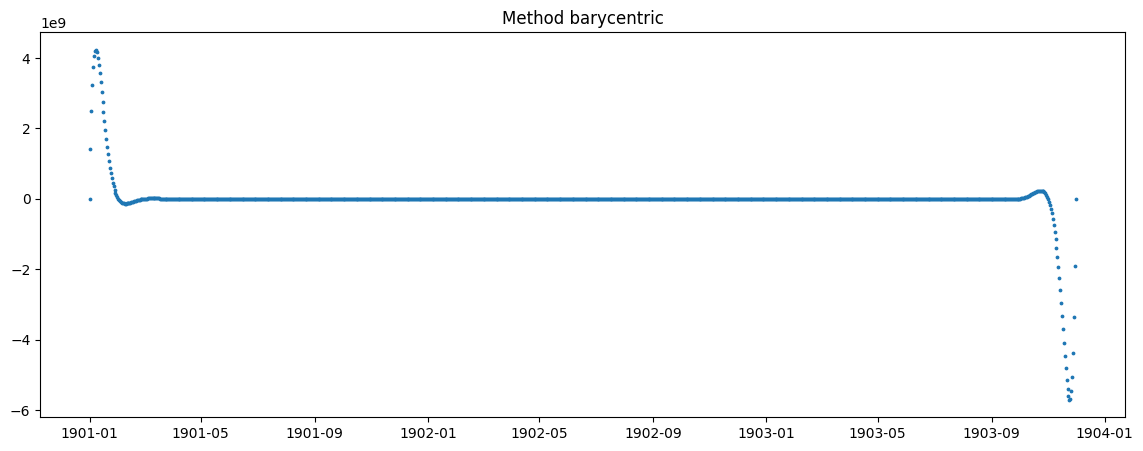

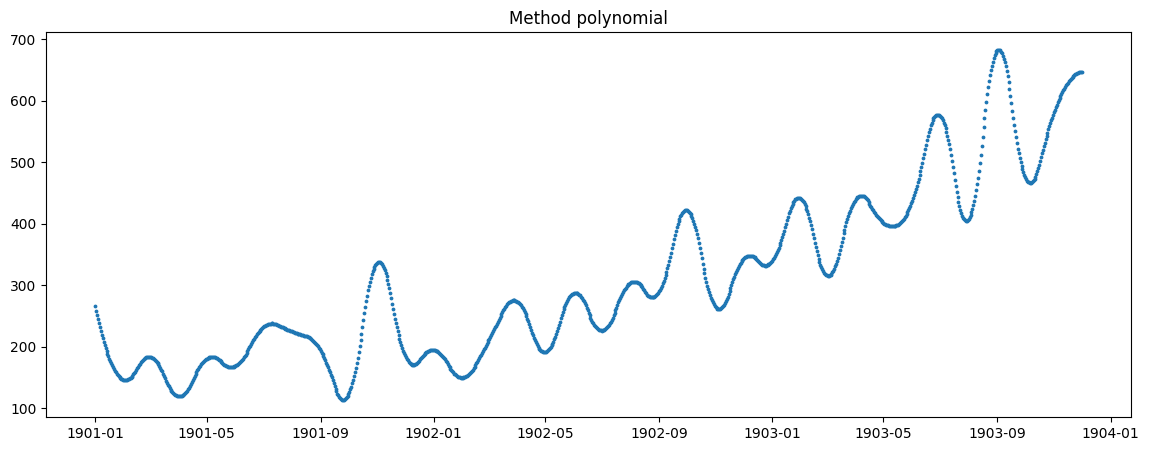

c:\Users\jmart\Documents\Proyectos\Data_Science\Time_Series\Time_Series\venv\Lib\site-packages\scipy\interpolate\_polyint.py:450: UserWarning: 36 degrees provided, degrees higher than about thirty cause problems with numerical instability with 'KroghInterpolator'
  P = KroghInterpolator(xi, yi, axis=axis)
c:\Users\jmart\Documents\Proyectos\Data_Science\Time_Series\Time_Series\venv\Lib\site-packages\scipy\interpolate\_polyint.py:357: RuntimeWarning: overflow encountered in multiply
  pi = w*pi
c:\Users\jmart\Documents\Proyectos\Data_Science\Time_Series\Time_Series\venv\Lib\site-packages\scipy\interpolate\_polyint.py:358: RuntimeWarning: invalid value encountered in add
  p += pi[:,np.newaxis] * self.c[k]
c:\Users\jmart\Documents\Proyectos\Data_Science\Time_Series\Time_Series\venv\Lib\site-packages\scipy\interpolate\_polyint.py:358: RuntimeWarning: invalid value encountered in multiply
  p += pi[:,np.newaxis] * self.c[k]


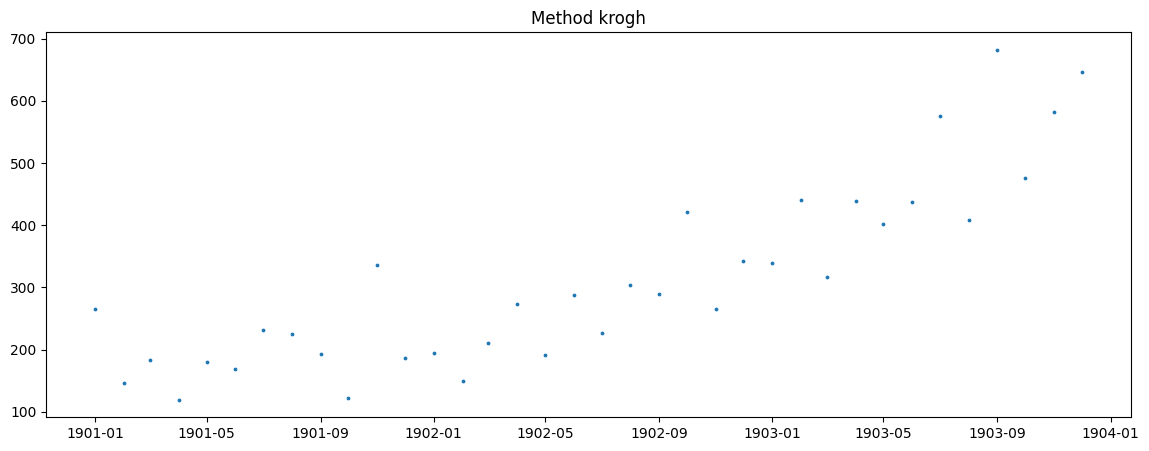

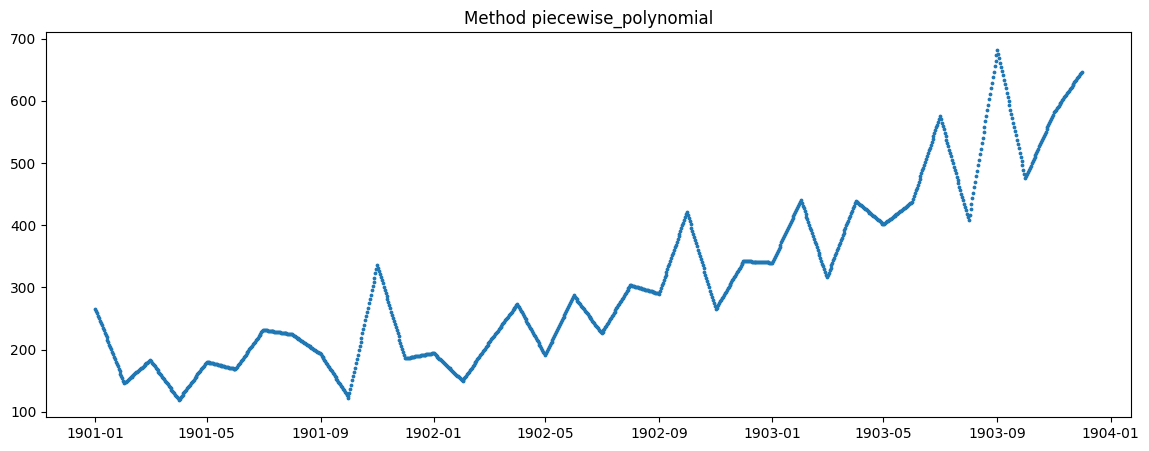

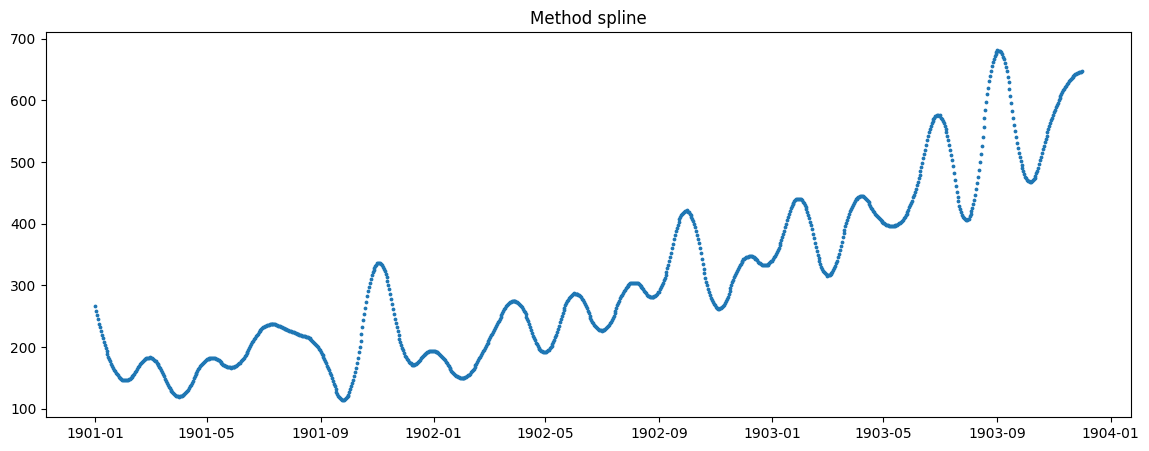

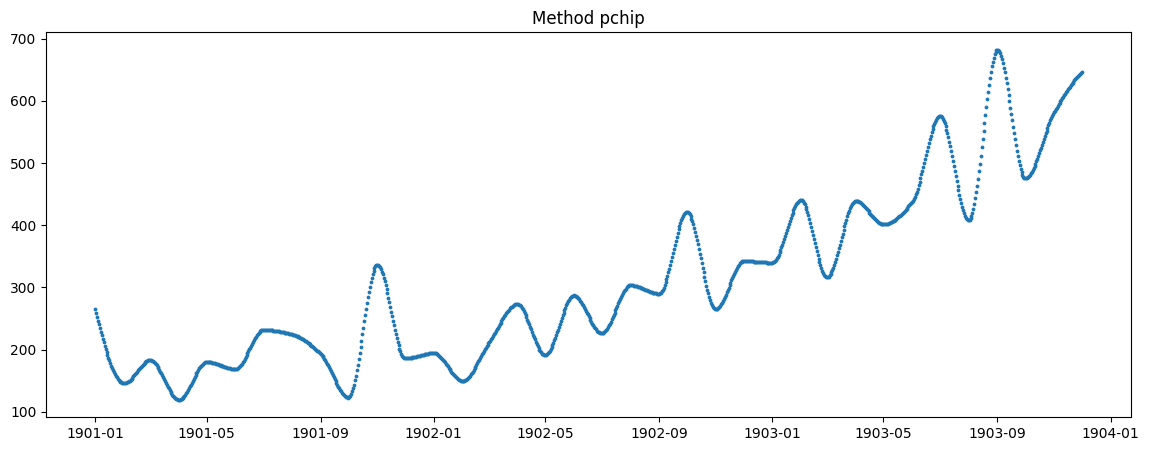

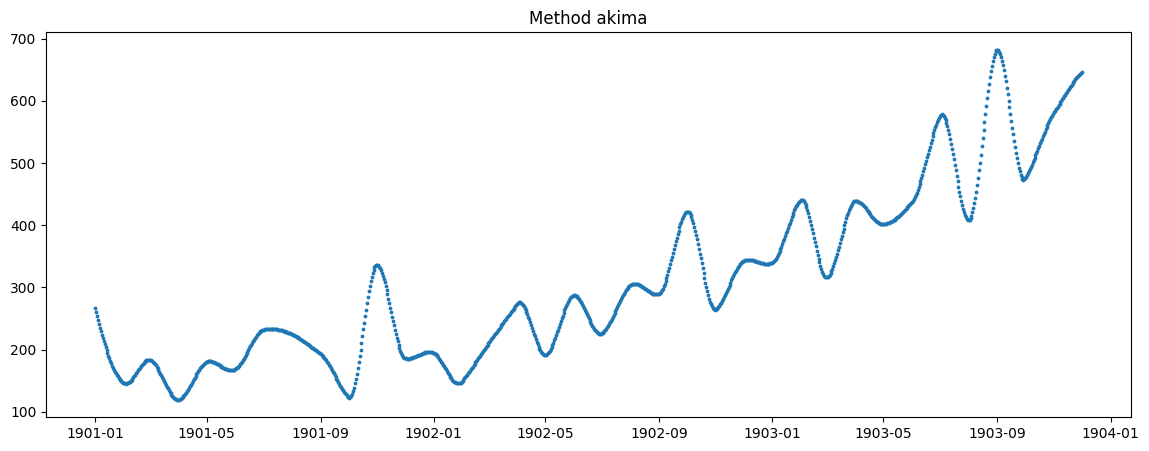

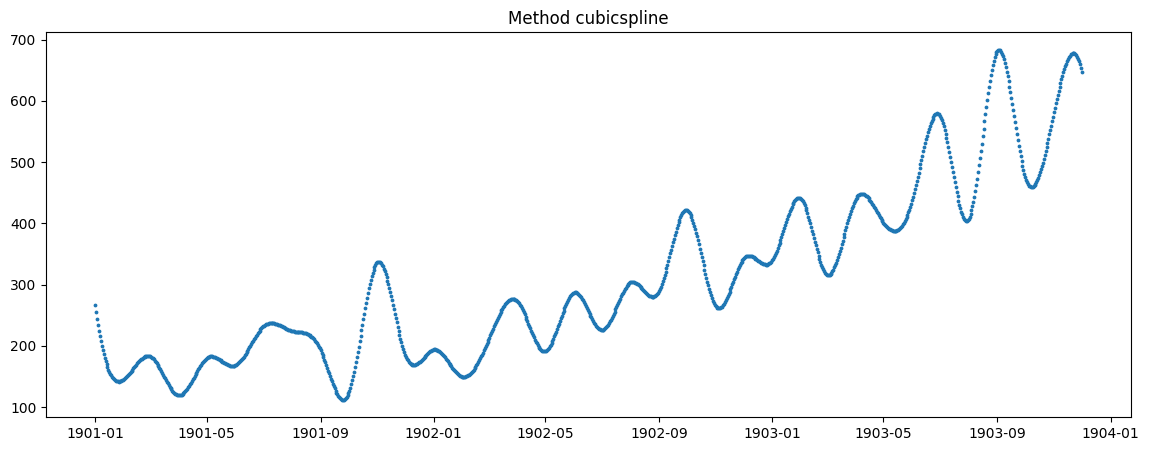

In [207]:
# fig, ax = plt.subplots(6, 3, figsize=(14, 10))

for i in methods:
    fig, ax = plt.subplots(figsize=(14, 5))

    interpolated = upsampled.interpolate(method=i, order=2)

    plt.scatter(
        interpolated.index,
        interpolated['Sales'],
        s=3
    )

    plt.title(f'Method {i}')


    plt.show()

## **Downsampling**

In [232]:
downsampling = shampoo_sales.resample('QE').mean()
downsampling 

,Sales
date,
1901-03-31,198.333333
1901-06-30,156.033333
1901-09-30,216.366667
1901-12-31,215.100000
1902-03-31,184.633333
1902-06-30,250.566667
1902-09-30,273.166667
1902-12-31,342.800000
1903-03-31,365.333333


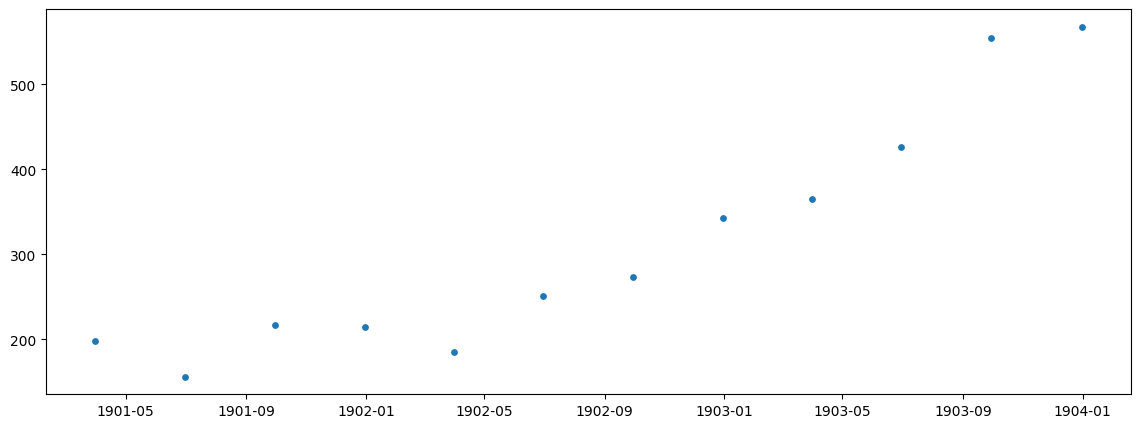

In [233]:
fig, ax = plt.subplots(figsize=(14, 5))

plt.scatter(
    downsampling.index,
    downsampling['Sales'],
    s=15
)

plt.show()